In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [3]:

file_path = "/content/airbnb.csv"
df = pd.read_csv(file_path)



In [4]:

df = df.drop(columns=['Unnamed: 0'])


df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['host_id'] = df['host_id'].astype('Int64')
df['checkin'] = df['checkin'].astype(str).str.extract(r'(\d{1,2} \d{2} (am|pm))')[0]
df['checkout'] = df['checkout'].astype(str).str.extract(r'(\d{1,2} \d{2} (am|pm))')[0]


In [5]:
df['host_name'].fillna('Unknown', inplace=True)
df['checkin'].fillna('Unknown', inplace=True)
df['checkout'].fillna('Unknown', inplace=True)
print(df.describe())


                 id       rating       reviews           host_id  \
count  1.280500e+04  8567.000000  12804.000000           12805.0   
mean   7.525187e+16     4.857475     36.064511  163819244.894807   
std    2.007933e+17     0.140803     65.525542  141362193.084354   
min    1.313100e+04     3.000000      0.000000           23039.0   
25%    2.023958e+07     4.770000      1.000000        37000317.0   
50%    3.682229e+07     4.890000     10.000000       125645881.0   
75%    4.999760e+07     4.980000     42.000000       263962254.0   
max    7.017905e+17     5.000000    943.000000       475897305.0   

              price     bathrooms          beds        guests        toiles  \
count  1.280500e+04  12805.000000  12805.000000  12805.000000  12805.000000   
mean   1.769780e+04      1.874424      3.316751      5.213745      0.019211   
std    4.569364e+04      2.091399      4.037791      3.808830      0.137272   
min    3.930000e+02      0.000000      0.000000      1.000000      0.00

<ipython-input-5-a99dc3e66030>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna('Unknown', inplace=True)
<ipython-input-5-a99dc3e66030>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

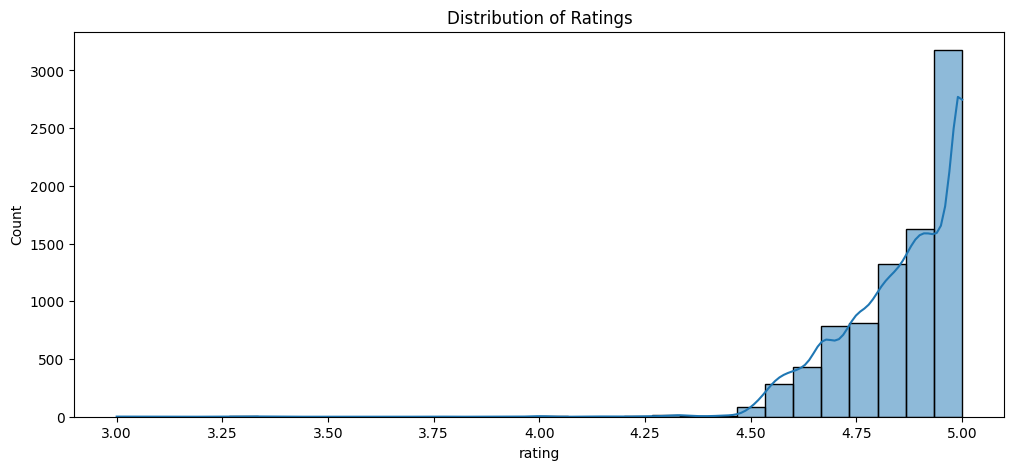

In [6]:
plt.figure(figsize=(12, 5))
sns.histplot(df['rating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Ratings")
plt.show()

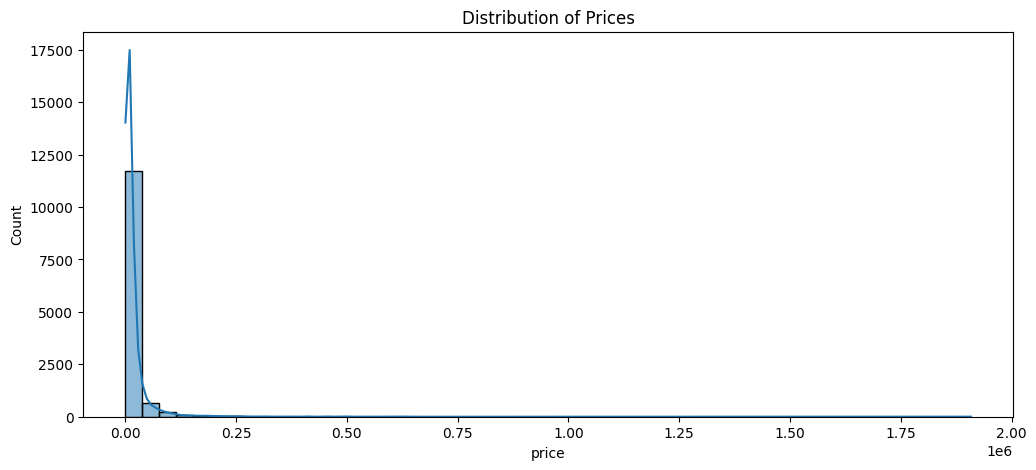

In [7]:


plt.figure(figsize=(12, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Prices")
plt.show()




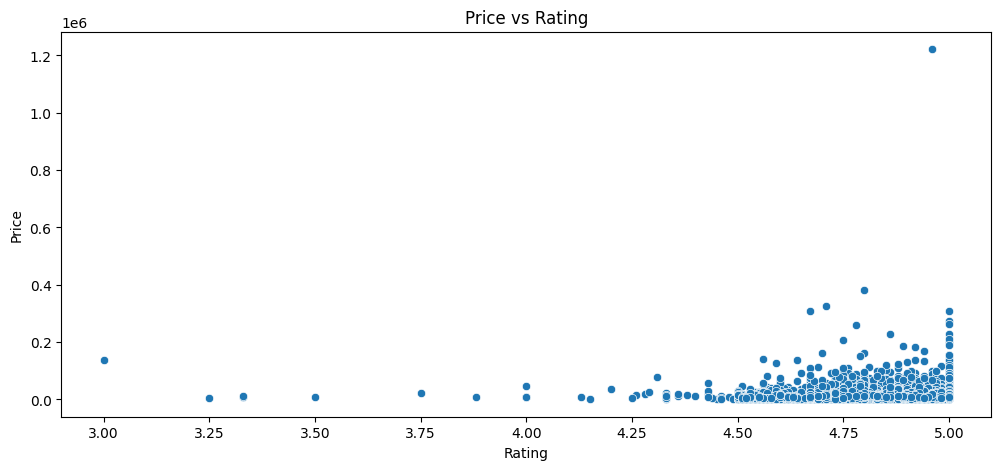

In [8]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['rating'], y=df['price'])
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()


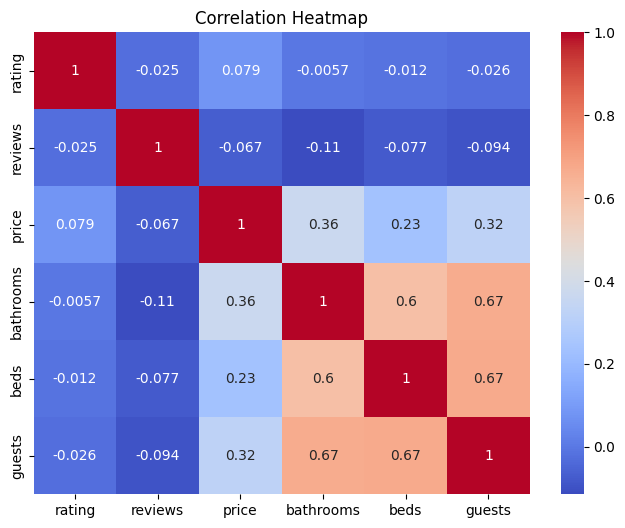

In [9]:

correlation_matrix = df[['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:

high_rating = df[df['rating'] >= 4.5]['price']
low_rating = df[df['rating'] < 4.5]['price']
t_stat, p_value = stats.ttest_ind(high_rating, low_rating, nan_policy='omit')

print(f"T-Test Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")
if p_value < 0.05:
    print("There is a significant difference in price based on rating.")
else:
    print("No significant difference in price based on rating.")




T-Test Statistic: -1.202, P-Value: 0.229
No significant difference in price based on rating.


In [11]:
print("Key Insights:")
print("- The majority of listings have a rating above 4.5.")
print("- Prices vary widely, with some extreme high values.")
print("- There is a weak correlation between rating and price.")
print("- Listings with more reviews tend to have lower price variability.")


Key Insights:
- The majority of listings have a rating above 4.5.
- Prices vary widely, with some extreme high values.
- There is a weak correlation between rating and price.
- Listings with more reviews tend to have lower price variability.


In [12]:
cleaned_file_path = "/content/cleaned_airbnb.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /content/cleaned_airbnb.csv
